# Transgrancanaria 2023 Classic 
*25 February 2023*

In [5]:
import sys
import pandas as pd
sys.path.append('../src/')
from results.results import Results
from scraper.scraper import LiveTrailScraper

In [6]:
# Data downloaded already (check scraper notebook)
results_raw = pd.read_csv('../data/transgrancanaria/transgrancanaria_classic_2023.csv', sep=',')
#results_raw = pd.read_csv('../data/transgrancanaria/transgrancanaria_advance_2023.csv', sep=',')

# Let's get the Control Points information
events = ['transgrancanaria']
years = ['2023']
scr = LiveTrailScraper(events=events, years=years)
control_points = scr.get_control_points()['classic']

results_raw.columns = list(results_raw.columns[:5]) + [k for k in control_points.keys()]

/VSCode/personnel/MLTrail/examples/../src/scraper/scraper.py:214: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup(data, 'lxml')


In [7]:
results_raw.head()

,n,doss,nom,prenom,cat,Salida Clasic,Tenoya,Arucas,Teror,Fontanales,El Hornillo,Artenara,Tejeda,Roque Nublo,Garañon,Tunte,Ayagaures,Meta Parque Sur
0,1,5,SIMON AYMERICH,Andreu,MA30H,00:00:13,00:49:27,01:33:37,02:48:50,04:09:20,05:20:20,06:59:50,08:24:31,09:45:43,10:09:25,11:22:00,12:29:37,13:39:46
1,2,14,ARSÉNIO,Miguel,EL H,00:00:13,00:51:13,01:36:42,02:52:18,04:14:16,05:28:13,07:12:03,08:34:43,09:50:27,10:12:13,11:26:32,12:34:22,13:44:50
2,3,17,GREEN,Tyler,MA30H,00:00:13,00:50:46,01:35:19,02:52:42,04:14:19,05:28:31,07:09:21,08:36:47,NaN,10:20:43,11:38:20,12:52:21,14:06:59
3,4,18,BUTACI,Raul,MA30H,00:00:13,00:49:34,01:33:48,02:49:13,04:10:40,05:19:47,06:58:30,08:27:01,09:51:18,10:16:20,11:35:38,12:54:03,14:15:53
4,5,1,CAPELL GIL,Pau,MA30H,00:00:13,00:49:32,01:34:13,02:51:44,04:14:25,05:28:59,07:09:50,08:38:52,10:01:31,10:26:54,11:52:23,13:09:01,14:22:28


In [8]:
control_points

{'Salida Clasic': (0.0, 0, 0),
 'Tenoya': (11.43, 348, -188),
 'Arucas': (19.44, 704, -482),
 'Teror': (31.95, 1509, -922),
 'Fontanales': (43.55, 2463, -1461),
 'El Hornillo': (53.51, 3089, -2339),
 'Artenara': (67.11, 4156, -2961),
 'Tejeda': (79.63, 4919, -3878),
 'Roque Nublo': (88.15, 5869, -4128),
 'Garañon': (91.32, 6042, -4372),
 'Tunte': (104.26, 6369, -5483),
 'Ayagaures': (116.57, 6803, -6500),
 'Meta Parque Sur': (130.74, 7000, -6970)}

In [9]:
control_points.pop(next(iter(control_points))) # Remove 1st CP (starting line)
times = results_raw[control_points.keys()]
rs = Results(controlPoints=control_points, times=times, offset=0, cleanDays=False)


In [10]:
rs.times

,Tenoya,Arucas,Teror,Fontanales,El Hornillo,Artenara,Tejeda,Roque Nublo,Garañon,Tunte,Ayagaures,Meta Parque Sur
0,00:49:27,01:33:37,02:48:50,04:09:20,05:20:20,06:59:50,08:24:31,09:45:43,10:09:25,11:22:00,12:29:37,13:39:46
1,00:51:13,01:36:42,02:52:18,04:14:16,05:28:13,07:12:03,08:34:43,09:50:27,10:12:13,11:26:32,12:34:22,13:44:50
2,00:50:46,01:35:19,02:52:42,04:14:19,05:28:31,07:09:21,08:36:47,09:50:27,10:20:43,11:38:20,12:52:21,14:06:59
3,00:49:34,01:33:48,02:49:13,04:10:40,05:19:47,06:58:30,08:27:01,09:51:18,10:16:20,11:35:38,12:54:03,14:15:53
4,00:49:32,01:34:13,02:51:44,04:14:25,05:28:59,07:09:50,08:38:52,10:01:31,10:26:54,11:52:23,13:09:01,14:22:28
...,...,...,...,...,...,...,...,...,...,...,...,...
333,01:26:04,02:50:17,05:41:11,08:19:01,11:12:06,14:39:05,17:47:56,19:36:15,20:10:23,23:05:33,"1 day, 1:57:34","1 day, 5:47:14"
334,01:24:59,02:48:45,05:27:58,07:55:14,10:19:50,13:26:09,16:37:33,19:04:33,19:51:23,23:19:40,"1 day, 2:16:54","1 day, 5:48:19"
335,01:17:34,02:28:35,04:48:21,07:11:10,09:35:29,12:53:51,16:02:34,18:41:08,19:36:36,22:48:22,"1 day, 1:59:10","1 day, 5:48:49"
336,01:20:43,02:41:12,05:12:05,07:43:17,10:14:53,13:31:40,17:04:12,19:31:15,20:16:01,23:09:21,"1 day, 2:09:48","1 day, 5:52:12"


In [11]:
rs.paces

,Tenoya,Arucas,Teror,Fontanales,El Hornillo,Artenara,Tejeda,Roque Nublo,Garañon,Tunte,Ayagaures,Meta Parque Sur
0,0:04:19,0:05:30,0:06:00,0:06:56,0:07:07,0:07:18,0:06:45,0:09:31,0:07:28,0:05:36,0:05:29,0:04:57
1,0:04:28,0:05:40,0:06:02,0:07:03,0:07:25,0:07:38,0:06:36,0:08:53,0:06:51,0:05:44,0:05:30,0:04:58
2,0:04:26,0:05:33,0:06:11,0:07:02,0:07:26,0:07:24,0:06:59,0:08:38,0:09:32,0:05:59,0:06:00,0:05:16
3,0:04:20,0:05:31,0:06:01,0:07:01,0:06:56,0:07:15,0:07:04,0:09:53,0:07:53,0:06:07,0:06:22,0:05:46
4,0:04:20,0:05:34,0:06:11,0:07:07,0:07:29,0:07:24,0:07:06,0:09:42,0:08:00,0:06:36,0:06:13,0:05:11
...,...,...,...,...,...,...,...,...,...,...,...,...
333,0:07:31,0:10:30,0:13:39,0:13:36,0:17:22,0:15:13,0:15:05,0:12:42,0:10:46,0:13:32,0:13:58,0:16:12
334,0:07:26,0:10:27,0:12:43,0:12:41,0:14:31,0:13:41,0:15:17,0:17:15,0:14:46,0:16:05,0:14:23,0:14:55
335,0:06:47,0:08:51,0:11:10,0:12:18,0:14:29,0:14:35,0:15:04,0:18:36,0:17:29,0:14:49,0:15:29,0:16:12
336,0:07:03,0:10:02,0:12:03,0:13:02,0:15:13,0:14:28,0:16:58,0:17:15,0:14:07,0:13:23,0:14:39,0:15:41


In [12]:
# Normalized paces are paces adjusted to positive elevation gain
# Each 100m climb adds a km for pace computation
rs.pacesNorm

,Tenoya,Arucas,Teror,Fontanales,El Hornillo,Artenara,Tejeda,Roque Nublo,Garañon,Tunte,Ayagaures,Meta Parque Sur
0,0:03:18,0:05:07,0:04:39,0:05:06,0:09:32,0:05:30,0:07:42,0:05:13,0:09:38,0:14:13,0:10:26,0:06:07
1,0:03:26,0:05:16,0:04:40,0:05:12,0:09:56,0:05:45,0:07:31,0:04:52,0:08:50,0:14:34,0:10:28,0:06:09
2,0:03:24,0:05:09,0:04:47,0:05:10,0:09:58,0:05:35,0:07:57,0:04:44,0:12:18,0:15:13,0:11:25,0:06:31
3,0:03:19,0:05:07,0:04:40,0:05:10,0:09:17,0:05:28,0:08:03,0:05:25,0:10:10,0:15:32,0:12:06,0:07:09
4,0:03:19,0:05:10,0:04:47,0:05:14,0:10:01,0:05:35,0:08:06,0:05:19,0:10:19,0:16:45,0:11:49,0:06:25
...,...,...,...,...,...,...,...,...,...,...,...,...
333,0:05:46,0:09:45,0:10:34,0:10:01,0:23:15,0:11:28,0:17:11,0:06:58,0:13:52,0:34:20,0:26:32,0:20:04
334,0:05:41,0:09:42,0:09:51,0:09:21,0:19:26,0:10:19,0:17:25,0:09:28,0:19:02,0:40:50,0:27:21,0:18:28
335,0:05:12,0:08:13,0:08:38,0:09:04,0:19:23,0:10:59,0:17:11,0:10:13,0:22:32,0:37:36,0:29:26,0:20:04
336,0:05:24,0:09:19,0:09:20,0:09:36,0:20:22,0:10:54,0:19:21,0:09:28,0:18:11,0:33:59,0:27:50,0:19:26


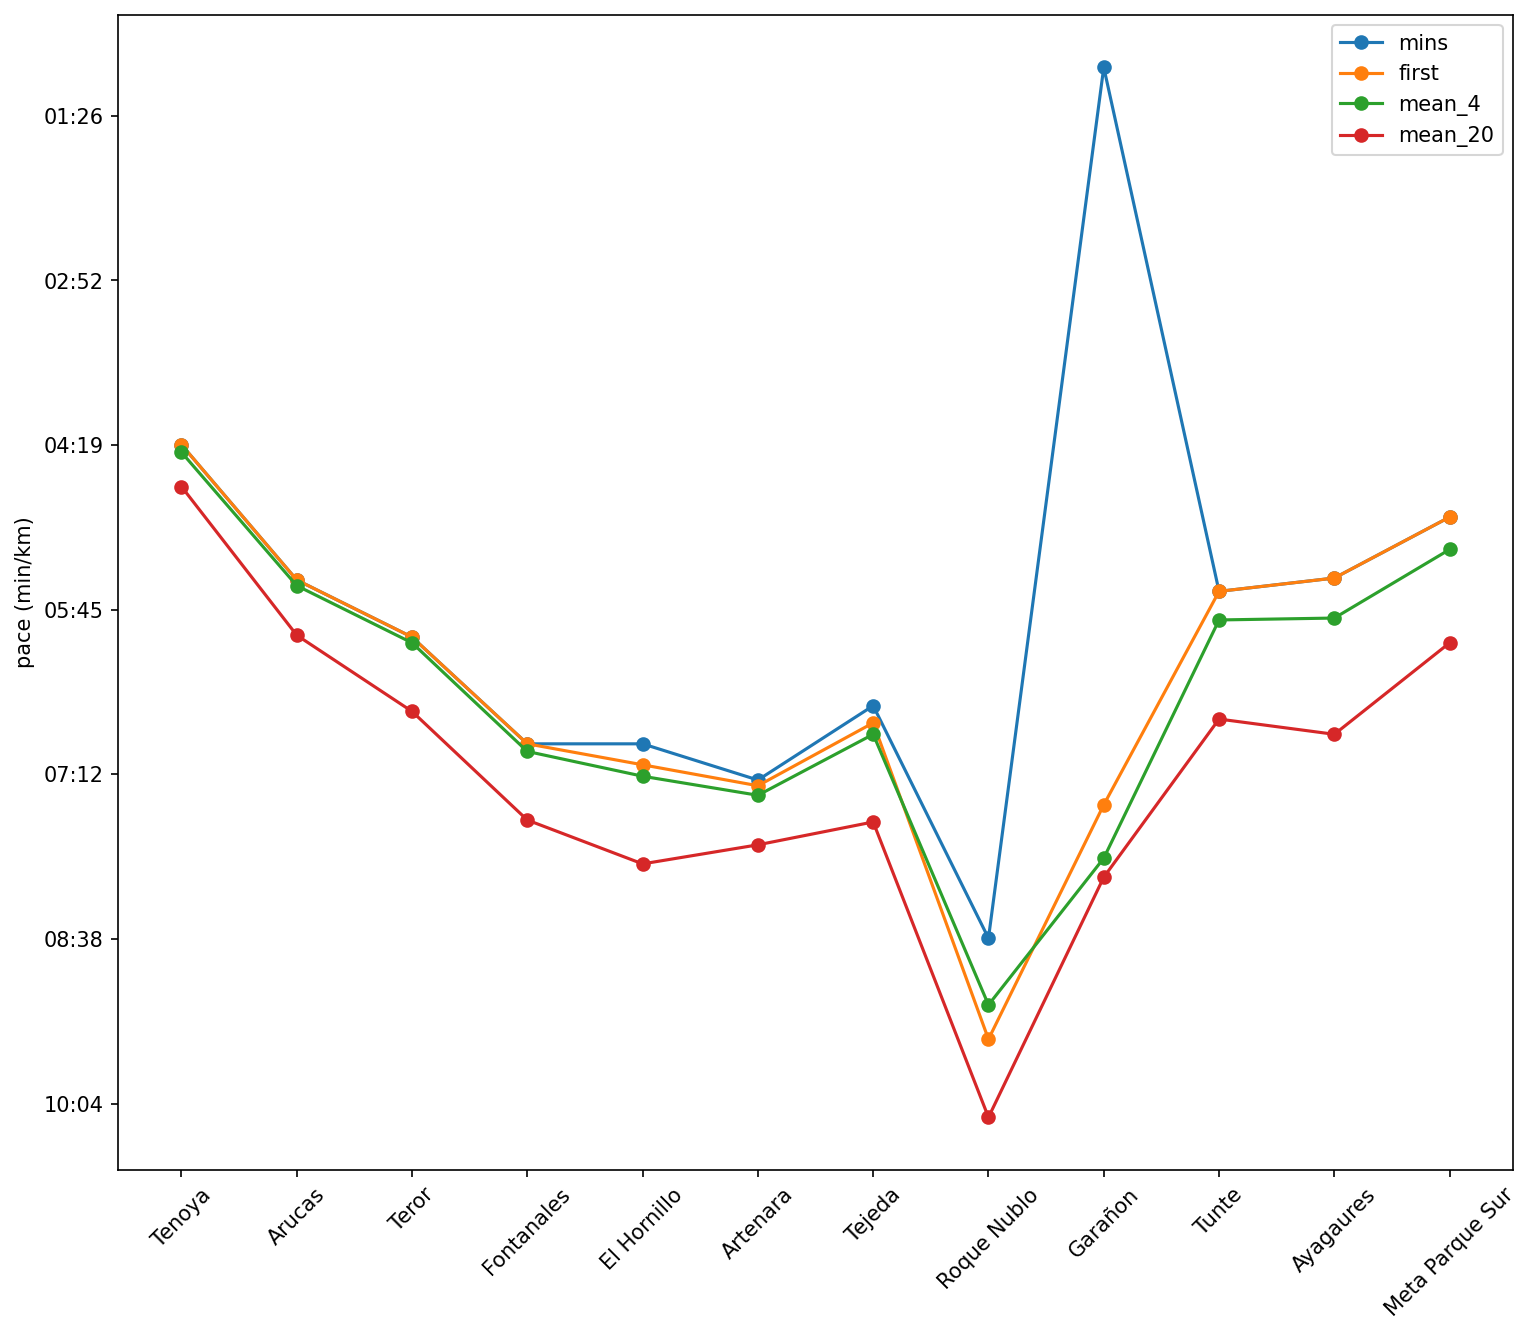

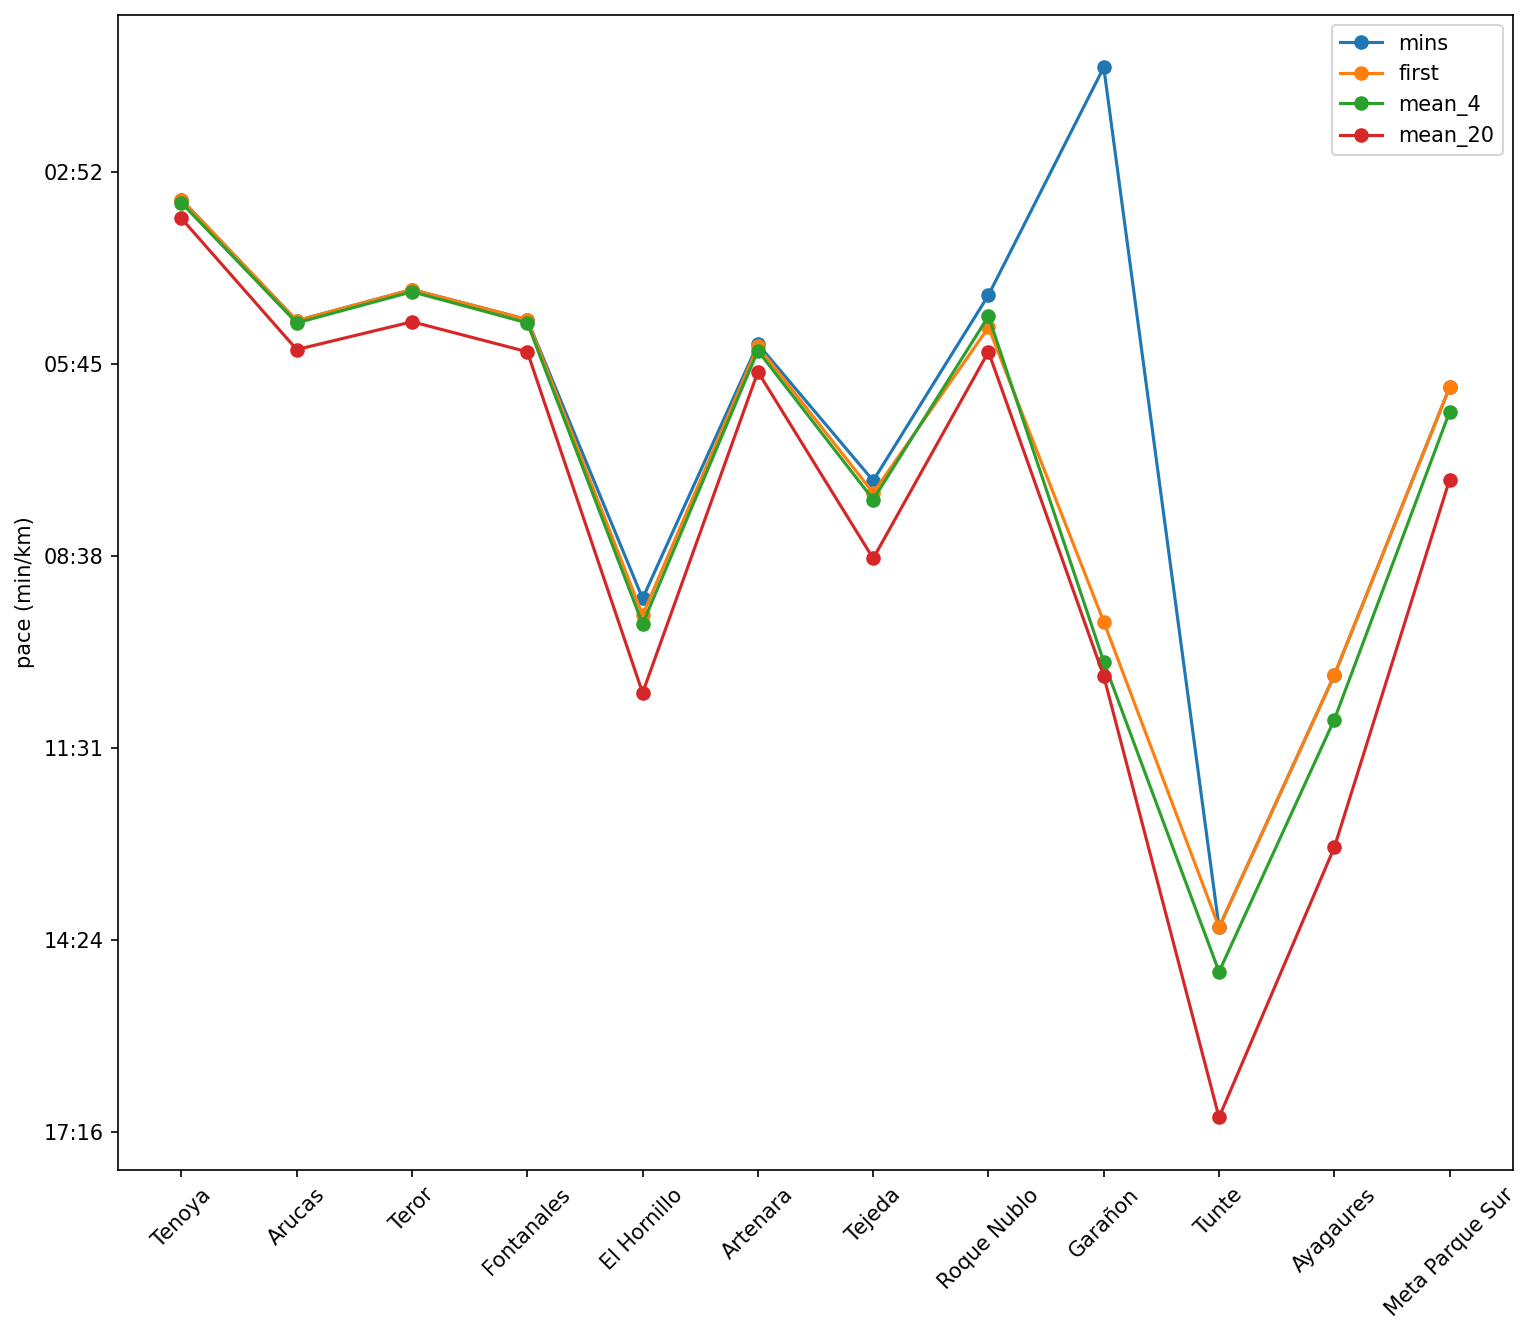

In [13]:
rs.plotControlPoints(rs.getStats(),xrotate=True,inverty=True)
rs.plotControlPoints(rs.getStatsNorm(),xrotate=True,inverty=True)

## Objective analysis

Choose the participant closest to your target time, entering his final position. Graph shows the mean paces or times for the 5 people closest to that time.

In [14]:
objectivePosition = rs.getClosestTimeToObjective('15:00:00')
rs.setObjective(objectivePosition)
obj = rs.getObjectivePaces()
mean_obj = rs.getObjectiveMeanPaces()

In [15]:
rs.paces.loc[objectivePosition-2:objectivePosition+2]

,Tenoya,Arucas,Teror,Fontanales,El Hornillo,Artenara,Tejeda,Roque Nublo,Garañon,Tunte,Ayagaures,Meta Parque Sur
6,0:04:45,0:06:09,0:06:33,0:07:23,0:07:47,0:07:25,0:06:53,0:09:16,0:07:19,0:06:11,0:06:30,0:05:46
7,0:04:24,0:05:41,0:06:22,0:07:19,0:07:26,0:07:38,0:07:10,0:09:45,0:07:52,0:06:31,0:06:57,0:06:08
8,0:04:24,0:05:36,0:06:16,0:07:28,0:07:25,0:07:39,0:07:11,0:09:45,0:07:56,0:06:23,0:07:12,0:06:27
9,0:04:49,0:06:13,0:06:47,0:07:51,0:08:13,0:07:37,0:07:37,0:09:34,0:07:22,0:05:56,0:06:19,0:06:15
10,0:04:52,0:06:07,0:06:48,0:07:37,0:07:53,0:07:28,0:07:15,0:10:11,0:07:31,0:06:38,0:07:08,0:05:32


In [16]:
rs.times

,Tenoya,Arucas,Teror,Fontanales,El Hornillo,Artenara,Tejeda,Roque Nublo,Garañon,Tunte,Ayagaures,Meta Parque Sur
0,00:49:27,01:33:37,02:48:50,04:09:20,05:20:20,06:59:50,08:24:31,09:45:43,10:09:25,11:22:00,12:29:37,13:39:46
1,00:51:13,01:36:42,02:52:18,04:14:16,05:28:13,07:12:03,08:34:43,09:50:27,10:12:13,11:26:32,12:34:22,13:44:50
2,00:50:46,01:35:19,02:52:42,04:14:19,05:28:31,07:09:21,08:36:47,09:50:27,10:20:43,11:38:20,12:52:21,14:06:59
3,00:49:34,01:33:48,02:49:13,04:10:40,05:19:47,06:58:30,08:27:01,09:51:18,10:16:20,11:35:38,12:54:03,14:15:53
4,00:49:32,01:34:13,02:51:44,04:14:25,05:28:59,07:09:50,08:38:52,10:01:31,10:26:54,11:52:23,13:09:01,14:22:28
...,...,...,...,...,...,...,...,...,...,...,...,...
333,01:26:04,02:50:17,05:41:11,08:19:01,11:12:06,14:39:05,17:47:56,19:36:15,20:10:23,23:05:33,"1 day, 1:57:34","1 day, 5:47:14"
334,01:24:59,02:48:45,05:27:58,07:55:14,10:19:50,13:26:09,16:37:33,19:04:33,19:51:23,23:19:40,"1 day, 2:16:54","1 day, 5:48:19"
335,01:17:34,02:28:35,04:48:21,07:11:10,09:35:29,12:53:51,16:02:34,18:41:08,19:36:36,22:48:22,"1 day, 1:59:10","1 day, 5:48:49"
336,01:20:43,02:41:12,05:12:05,07:43:17,10:14:53,13:31:40,17:04:12,19:31:15,20:16:01,23:09:21,"1 day, 2:09:48","1 day, 5:52:12"


In [17]:
mean_obj_times = rs.getObjectiveMeanTimes()
mean_obj_times


,Tenoya,Arucas,Teror,Fontanales,El Hornillo,Artenara,Tejeda,Roque Nublo,Garañon,Tunte,Ayagaures,Meta Parque Sur
0,0:53:12,1:40:56,3:03:02,4:30:24,5:47:40,7:30:33,9:01:05,10:23:52,10:48:00,12:10:02,13:34:06,14:59:39


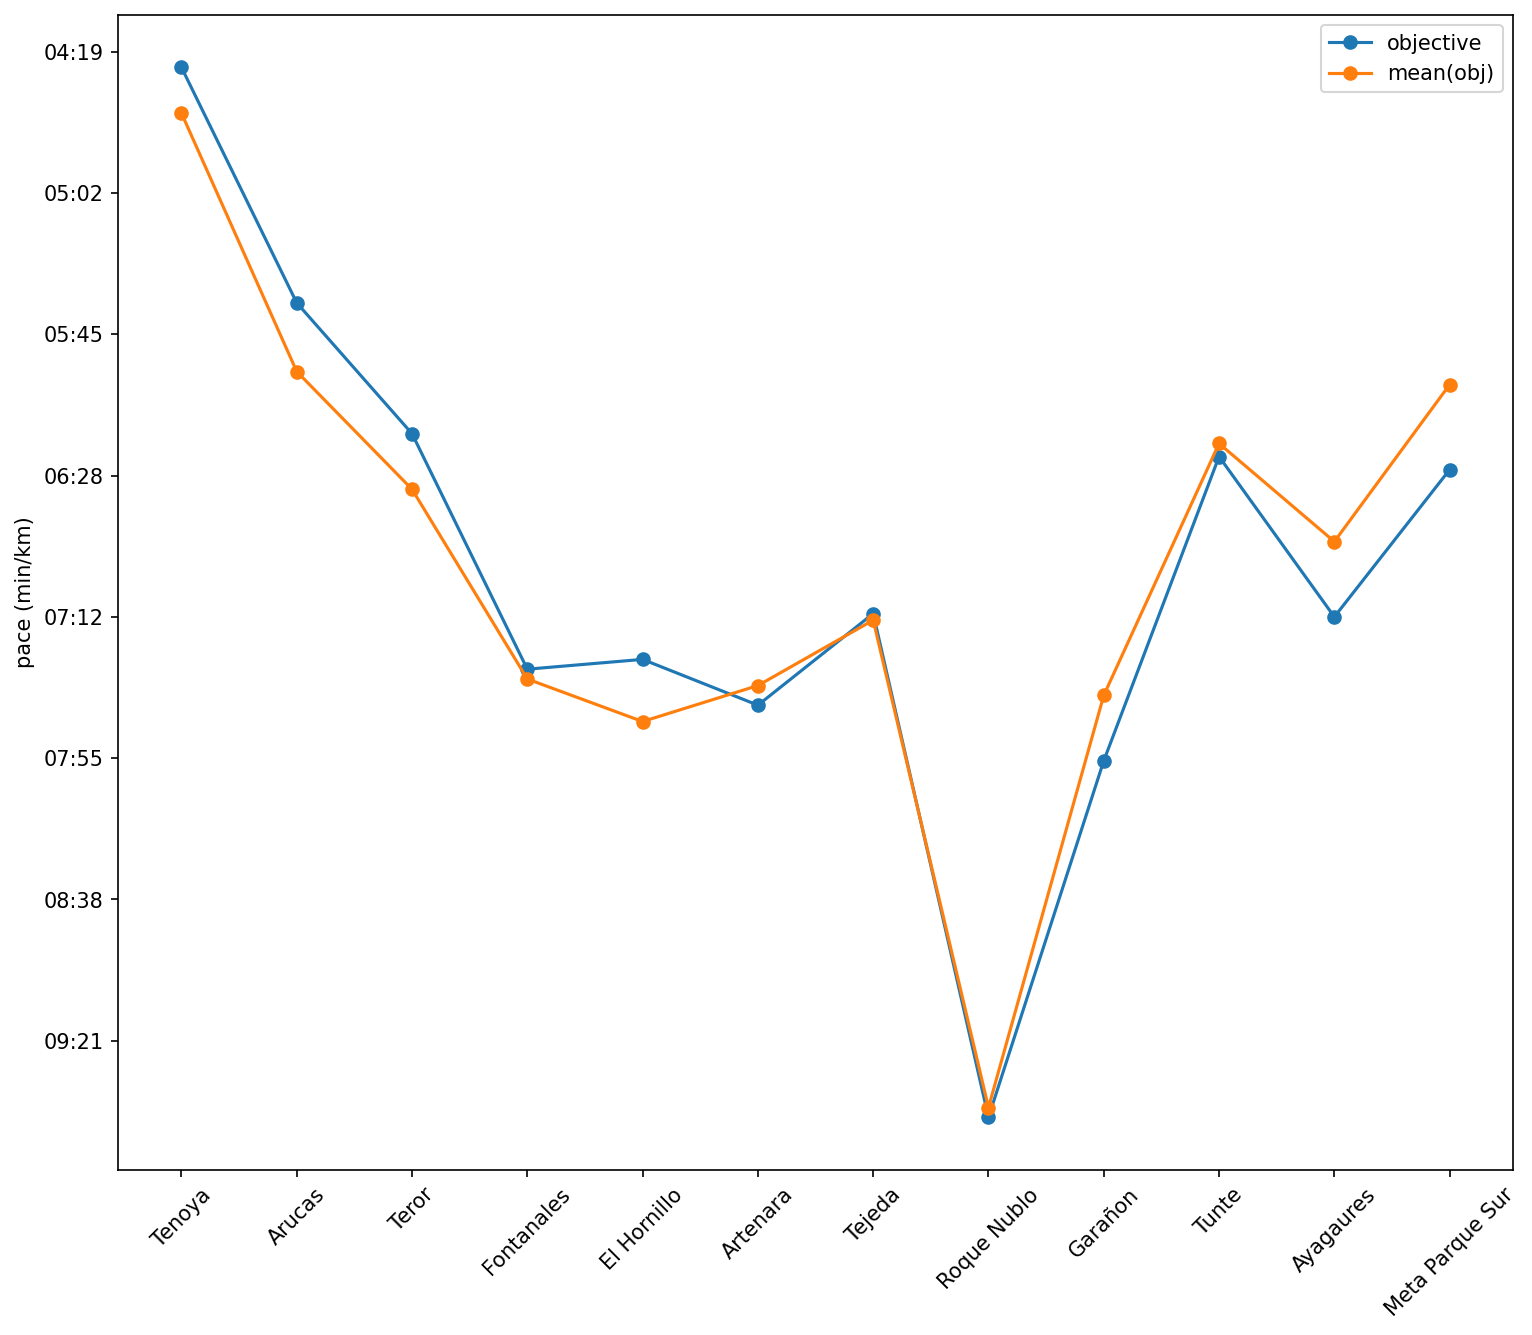

In [18]:
index = ['objective','mean(obj)']
paces = pd.concat([obj,mean_obj],ignore_index=True)
paces['index'] = index
paces.set_index('index',inplace=True)

rs.plotControlPoints(paces,xrotate=True,inverty=True)


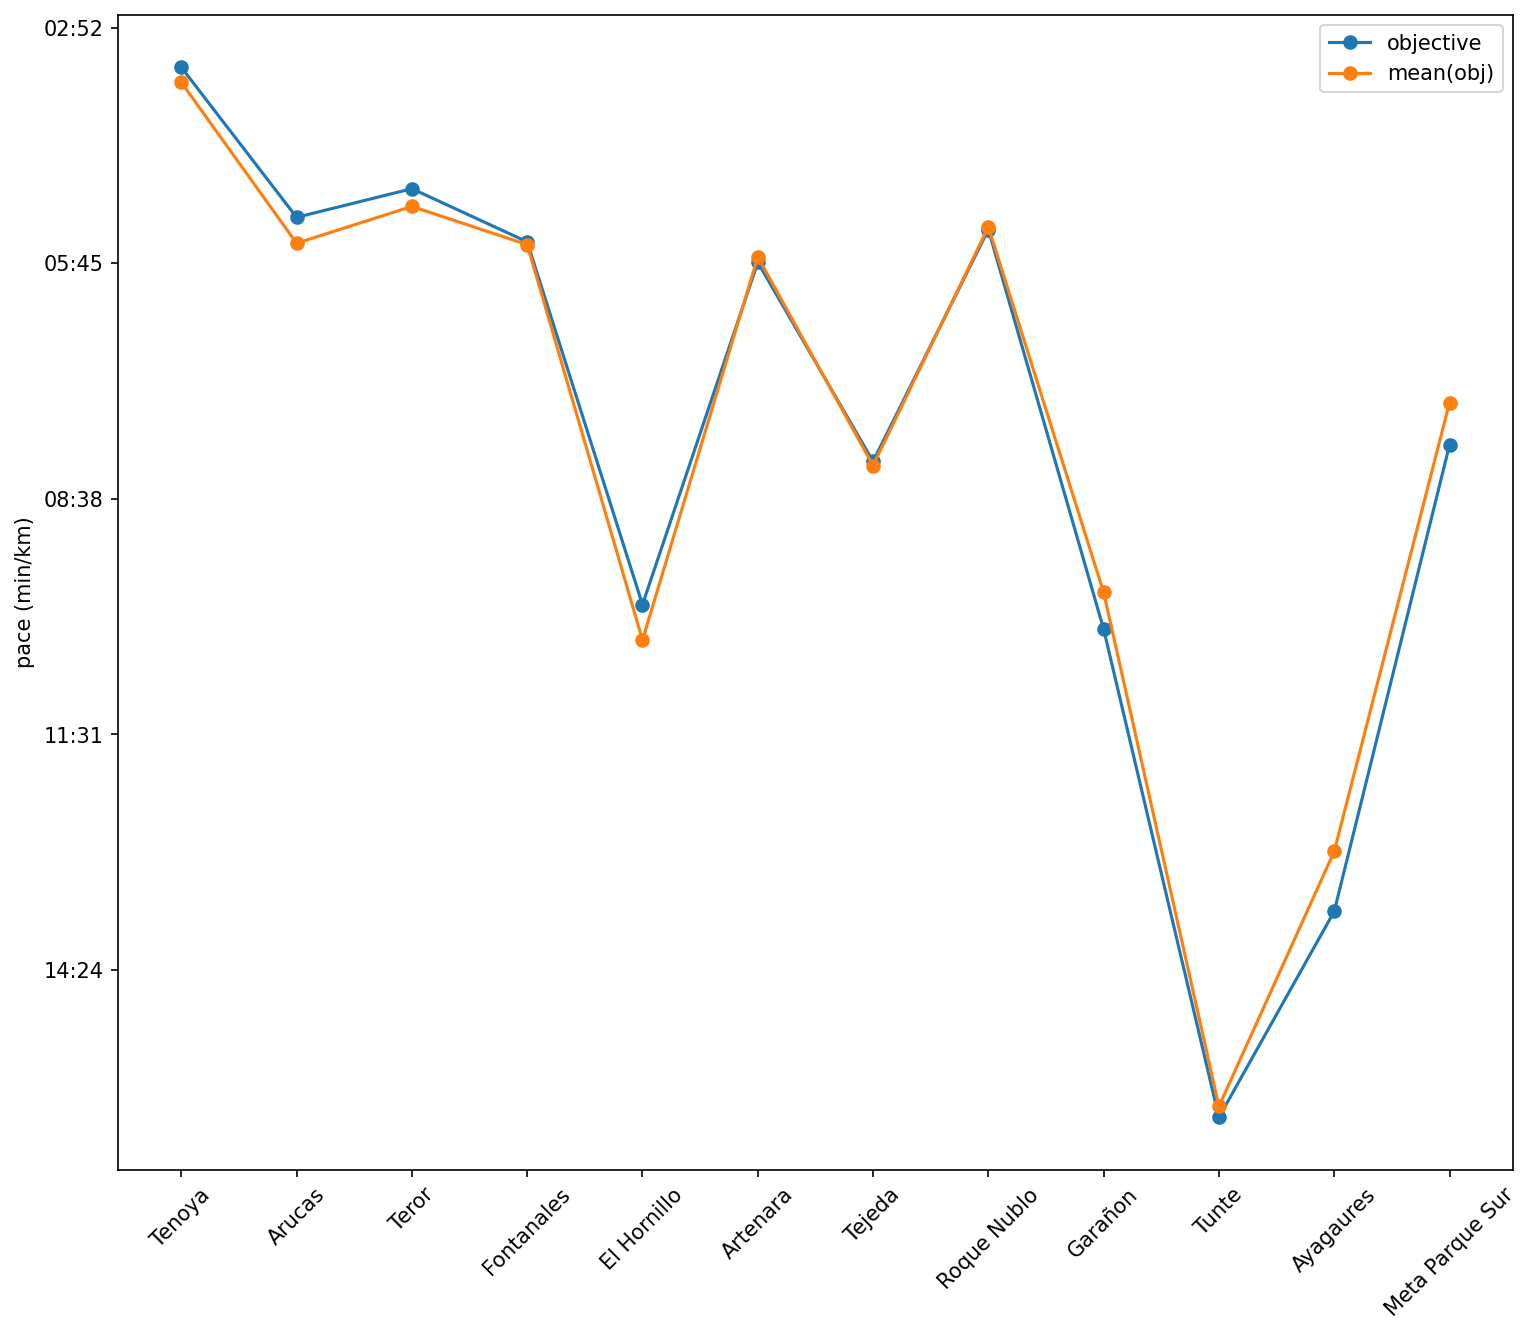

In [19]:
index = ['objective','mean(obj)']
paces = pd.concat([rs.getObjectivePacesNorm(),rs.getObjectiveMeanPacesNorm()],ignore_index=True)
paces['index'] = index
paces.set_index('index',inplace=True)

rs.plotControlPoints(paces,xrotate=True,inverty=True)


In [27]:
table_objs=[]
for t in ['25:00:00', '26:00:00', '27:00:00']:
    objectivePosition = rs.getClosestTimeToObjective(t)
    rs.setObjective(objectivePosition)
    obj = rs.getObjectivePaces()
    mean_obj = rs.getObjectiveMeanTimes()
    table_objs.append(mean_obj)
#mean_obj[mean_obj.columns[:7]]

index = ['25h', '26h', '27h']

mean_obj = pd.concat([table_objs[0],table_objs[1],table_objs[2]],ignore_index=True).rename(columns={'Meta Parque Sur' : 'Meta'})#, axis=1)
mean_obj['Objectiu'] = index
mean_obj.set_index('Objectiu',inplace=True)

mean_obj

,Tenoya,Arucas,Teror,Fontanales,El Hornillo,Artenara,Tejeda,Roque Nublo,Garañon,Tunte,Ayagaures,Meta
Objectiu,,,,,,,,,,,,
25h,1:19:15,2:33:20,4:42:34,6:52:41,8:51:55,11:29:39,13:56:30,16:19:43,17:07:56,19:46:37,22:09:08,25:00:24
26h,1:10:49,2:18:11,4:28:55,6:38:28,8:42:02,11:30:21,14:15:55,16:46:35,17:29:48,20:25:35,23:05:57,26:00:15
27h,1:17:12,2:29:05,4:45:43,7:01:19,9:10:53,12:03:24,14:54:07,17:37:49,18:25:24,21:14:24,24:00:27,26:58:58


In [29]:
mean_obj.map(lambda x: x[:-3] if isinstance(x, str) and len(x) > 3 else x)

,Tenoya,Arucas,Teror,Fontanales,El Hornillo,Artenara,Tejeda,Roque Nublo,Garañon,Tunte,Ayagaures,Meta
Objectiu,,,,,,,,,,,,
25h,1:19,2:33,4:42,6:52,8:51,11:29,13:56,16:19,17:07,19:46,22:09,25:00
26h,1:10,2:18,4:28,6:38,8:42,11:30,14:15,16:46,17:29,20:25,23:05,26:00
27h,1:17,2:29,4:45,7:01,9:10,12:03,14:54,17:37,18:25,21:14,24:00,26:58
